In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words = 500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [5]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
              metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                  restore_best_weights = True)
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 47ms/step - loss: 0.6927 - accuracy: 0.5344 - val_loss: 0.6922 - val_accuracy: 0.5756
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6911 - accuracy: 0.5982 - val_loss: 0.6899 - val_accuracy: 0.6202
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6866 - accuracy: 0.6507 - val_loss: 0.6829 - val_accuracy: 0.6372
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6665 - accuracy: 0.6393 - val_loss: 0.6373 - val_accuracy: 0.6728
Epoch 5/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6049 - accuracy: 0.7295 - val_loss: 0.5936 - val_accuracy: 0.7338
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5788 - accuracy: 0.7502 - val_loss: 0.5740 - val_accuracy: 0.7472
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5603 - accuracy: 0.7606 - val_loss: 0.5581 - val_ac

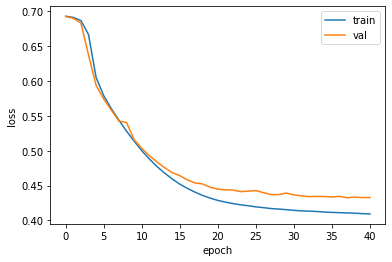

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
              metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                  restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 25s 43ms/step - loss: 0.6928 - accuracy: 0.5260 - val_loss: 0.6922 - val_accuracy: 0.5796
Epoch 2/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6913 - accuracy: 0.5930 - val_loss: 0.6902 - val_accuracy: 0.6164
Epoch 3/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6876 - accuracy: 0.6368 - val_loss: 0.6844 - val_accuracy: 0.6684
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6757 - accuracy: 0.6765 - val_loss: 0.6600 - val_accuracy: 0.6854
Epoch 5/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6271 - accuracy: 0.7107 - val_loss: 0.6117 - val_accuracy: 0.7140
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5993 - accuracy: 0.7235 - val_loss: 0.5921 - val_accuracy: 0.7274
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5816 - accuracy: 0.7343 - val_loss: 0.5753 - val_ac

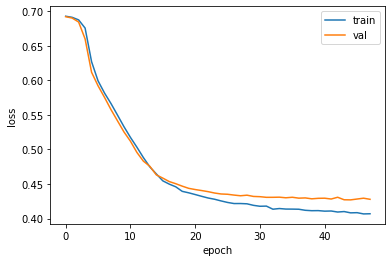

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [18]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [19]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_5 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_6 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
              metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                  restore_best_weights = True)
history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 56s 85ms/step - loss: 0.6926 - accuracy: 0.5342 - val_loss: 0.6915 - val_accuracy: 0.5786
Epoch 2/100
313/313 [==============================] - 25s 81ms/step - loss: 0.6872 - accuracy: 0.6014 - val_loss: 0.6742 - val_accuracy: 0.5996
Epoch 3/100
313/313 [==============================] - 25s 81ms/step - loss: 0.6411 - accuracy: 0.6716 - val_loss: 0.6011 - val_accuracy: 0.7114
Epoch 4/100
313/313 [==============================] - 26s 82ms/step - loss: 0.5772 - accuracy: 0.7287 - val_loss: 0.5526 - val_accuracy: 0.7350
Epoch 5/100
313/313 [==============================] - 26s 82ms/step - loss: 0.5382 - accuracy: 0.7501 - val_loss: 0.5245 - val_accuracy: 0.7532
Epoch 6/100
313/313 [==============================] - 26s 82ms/step - loss: 0.5137 - accuracy: 0.7623 - val_loss: 0.5023 - val_accuracy: 0.7664
Epoch 7/100
313/313 [==============================] - 25s 81ms/step - loss: 0.4976 - accuracy: 0.7721 - val_loss: 0.4895 - val_ac

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model4.summary()

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
              metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                  restore_best_weights = True)
history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()